In [1]:
from pymongo import MongoClient
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt #한글을 지원안함, 한글 폰트 지정필수
import seaborn as sns
import platform 

In [2]:
#mongoDB 연결
conn = MongoClient("mongodb://localhost")
webtoon = conn.webtoon
docu = webtoon.docu

In [3]:
#크롤링 연결
mon_url = 'https://comic.naver.com/webtoon/weekdayList.nhn?week=mon'
headers = {'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57'}
response = requests.get(mon_url, headers=headers)
res = response.text
soup = BeautifulSoup(res, 'html.parser')

In [4]:
#리스트 생성
title = []
writer = []
stars = []

In [5]:
#제목에 대한 값 추출 후 저장.
result_title = soup.select('.daily_img > ul > li > dl > dt > a ')
result_title[0].get('title')
for x in result_title:
    title.append(x.get('title'))

In [6]:
#작가에 대한 값 추출 후 저장.
result_writer = soup.select('.daily_img > ul > li > dl > dd.desc > a ')
list_writer = result_writer
for x in list_writer:
    writer.append(x.text)

In [7]:
#평점에 대한 값 추출 후 저장.
result_stars = soup.select('.daily_img > ul > li > dl > dd > div > strong ')
for x in result_stars:
    stars.append(x.text)

In [8]:
#결과를 저장후 DB에 연결
diction = []
for i in range(51):
    webtoon = {}
    webtoon.update(title = title[i])
    webtoon.update(writer = writer[i])
    webtoon.update(stars = stars[i])
    diction.append(webtoon)
webtoon = conn.webtoon
doc = webtoon.docu
doc.insert_many(diction)
doc.find()

In [9]:
#DB에 연결되어있는 값 가져와서 읽기
data = pd.read_csv('docu.csv') #주피터파일과 같은경로에 놔야 읽어줌

In [10]:
#한글 폰트 지정, 세팅 방법
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

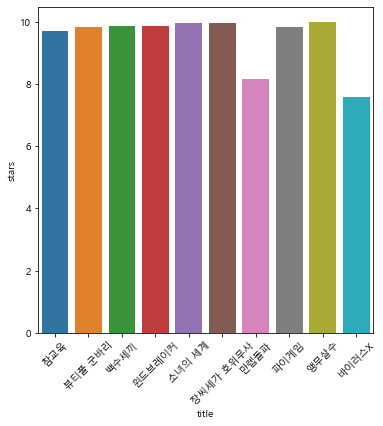

In [11]:
#bar형태로 그래프 출력
plt.figure(figsize=[6,6])

bar = sns.barplot(x='title', y='stars', data=data.head(10))#x축에 타이틀, y축에 라이크
#10개만 출력

for item in bar.get_xticklabels():
    item.set_rotation(45)

plt.show()

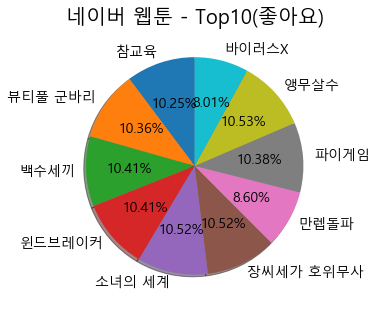

In [12]:
#원 형태로 그래프 출력

plt.figure(figsize=[5,5])

plt.pie(data['stars'].head(10),
       explode=[0,0,0,0,0,0,0,0,0,0], 
        labels=data['title'].head(10), 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) 

plt.title('네이버 웹툰 - Top10(좋아요)', fontsize=20)
plt.show()


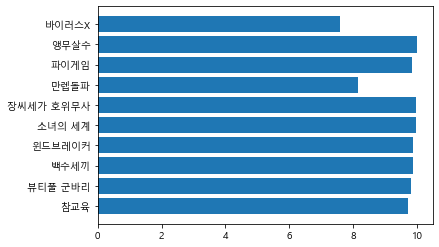

In [13]:
#bar형태로 그래프 출력

plt.figure()
plt.barh(data['title'].head(10), data['stars'].head(10))
plt.show()